In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from scipy import stats
import scipy

# Новый раздел

In [ ]:
# функция для проверки нормальности
def normal_test(x):
  k2, p = stats.normaltest(x)
  alpha = 1e-3
  print("p = {:g}".format(p))
  print("null hypothesis: x comes from a normal distribution")
  if p < alpha:  
     print("The null hypothesis can be rejected")
  else:
     print("The null hypothesis cannot be rejected")

In [ ]:
# функция для регрессии индексов
def regression_index(X_subset, period):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    period = 2
    plt.scatter(X_subset[:, 0], X_subset[:, 1])   # визуализируем точки
    lr = LinearRegression()
    lr.fit(X_subset[:, 0][:, np.newaxis], X_subset[:, 1])  # найдем веса линейной модели
    grid = np.linspace(0, 28, 1000)
    line = lr.predict(grid[:, np.newaxis])
    plt.plot(grid, line)   # визуализируем прямую
    prognoz = 1
    for i in range(period):
      prognoz *= ((lr.predict(np.array(len(X_subset[:, 0])+ i).reshape(1, -1))[0]/100) + 1)
    plt.xlim(-1, 30)
    plt.ylim(-13, 13)
    plt.xlabel("номер недели")
    plt.ylabel("доходность")
    plt.show()
    return round((prognoz - 1)*100,3)

In [ ]:
# функция для чтения файла и сохранения доходностей в матрицу 
def prof_matrix(filename):
  X_stock = pd.read_csv(filename,  sep=',')
  X_stock_list = []
  for elem in X_stock['Change %']:
    X_stock_list.append(str(elem)[:-1])
  X_stock_train = (np.array(X_stock_list)[::-1]).reshape(-1, 1).astype(np.float)
  return X_stock_train

In [ ]:
# функция для регрессии индекса и акции
def regression_index_stock(X_subset, index, stdev):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X_subset[:, 0], X_subset[:, 1])   # визуализируем точки
    lr = LinearRegression()
    lr.fit(X_subset[:, 0][:, np.newaxis], X_subset[:, 1])  # найдем веса линейной модели
    grid = np.linspace(-5, 5, 100)
    line = lr.predict(grid[:, np.newaxis])
    plt.plot(grid, line)   # визуализируем прямую
    w = lr.coef_[0]
    inter = lr.intercept_
    p = 0.65
    d = len(X_subset[:, 0][:, np.newaxis]) - 2
    k = stats.t.ppf(p, d)
    ME = k * stdev
    pr = lr.predict(np.array(index).reshape(1, -1))
    plt.ylim(-33, 33)
    plt.xlim(-6, 6)
    plt.xlabel("доходность индекса")
    plt.ylabel("доходность акции")
    plt.show()
    d = len(X_subset[:, 0][:, np.newaxis]) - 2 ###
    confidence_level = 95 ###
    alpha = 1 - (confidence_level / 100) ###
    # critical probability (p*)
    p = 1 - alpha/2. ###
    k = stats.t.ppf(p, d) ###
    SE = scipy.stats.sem(1.0*np.array(X_subset[:, 0][:, np.newaxis])) ###
    ME = k * SE ###
    print(f"interval: [{round((pr - ME)[0],3)}, {round((pr + ME)[0],3)}]") ###
    return pr, w, inter 

In [ ]:
# функция объединяет верхние функции и делает всю обработку акции
def main_func(ticker, filename):
  print(ticker)
  X_stock = prof_matrix(filename)
  #проверка
  normal_test(X_stock.reshape(1, -1)[0])
  stdev = round(np.std(X_stock.reshape(1, -1)[0]),3)
  print(f"\nриск={stdev}")
  X_index_stock = np.hstack((X_index, X_stock))
  predict, w, inter= regression_index_stock(X_index_stock, 0.551, stdev)
  print(f"Ожидаемая доходность через 1 неделю={round(predict[0],3)}\n \
  w={round(w,3)}, intercept={round(inter, 3)}")

In [ ]:
X_index = prof_matrix('S&P 500 Historical Data.csv')
#проверка
normal_test(X_index.reshape(1, -1)[0])

p = 0.293765
null hypothesis: x comes from a normal distribution
The null hypothesis cannot be rejected


In [ ]:
# всего у нас 26 строк с данными доходностей
weeks = np.arange(26).reshape(-1, 1)
X_weeks_index = np.hstack((weeks, X_index))

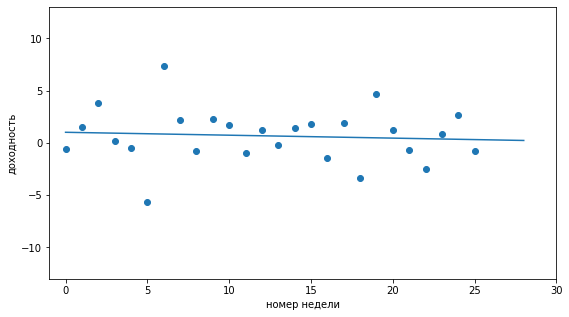

Прогнозируемая доходность через 1 неделю/недели: 0.551


In [ ]:
period = 1
predict = regression_index(X_weeks_index, period)
print(f"Прогнозируемая доходность через {period} неделю/недели: {predict}")

ETSY_Etsy
p = 0.205684
null hypothesis: x comes from a normal distribution
The null hypothesis cannot be rejected

риск=9.48


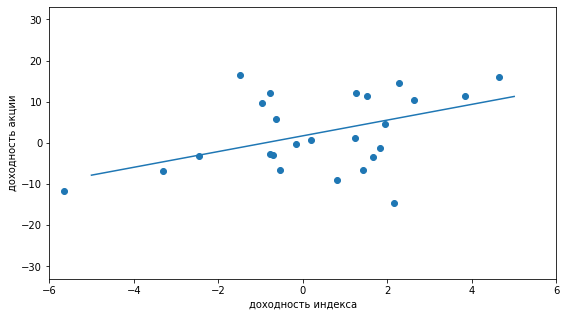

interval: [1.726, 3.821]
Ожидаемая доходность через 1 неделю=2.774
   w=1.911, intercept=1.721


In [ ]:
main_func("ETSY_Etsy", 'ETSY Historical Data.csv')

SLG_SL_Green
p = 0.00361591
null hypothesis: x comes from a normal distribution
The null hypothesis cannot be rejected

риск=7.066


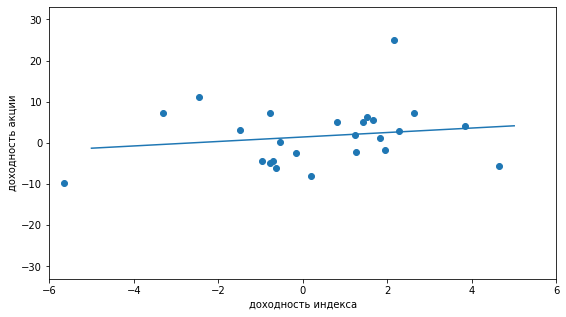

interval: [0.686, 2.781]
Ожидаемая доходность через 1 неделю=1.733
   w=0.544, intercept=1.434


In [ ]:
main_func("SLG_SL_Green", 'SLG Historical Data.csv')

AMP_Amerprise
p = 0.775617
null hypothesis: x comes from a normal distribution
The null hypothesis cannot be rejected

риск=4.225


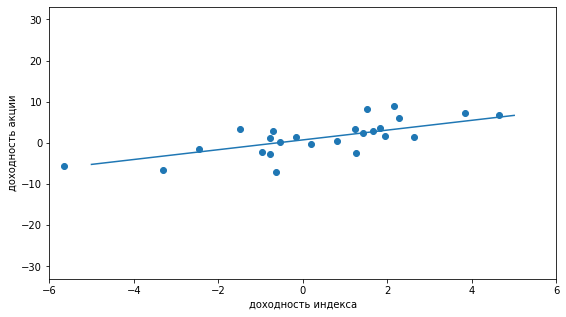

interval: [0.339, 2.434]
Ожидаемая доходность через 1 неделю=1.386
   w=1.19, intercept=0.73


In [ ]:
main_func("AMP_Amerprise", 'AMP Historical Data.csv')

NVDA_Nvidia
p = 0.258391
null hypothesis: x comes from a normal distribution
The null hypothesis cannot be rejected

риск=5.753


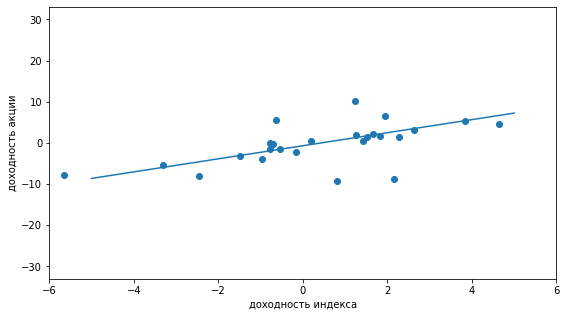

interval: [-0.866, 1.229]
Ожидаемая доходность через 1 неделю=0.181
   w=1.587, intercept=-0.693


In [ ]:
main_func("NVDA_Nvidia", 'NVDA Historical Data.csv')

DIS_Disney
p = 0.0864203
null hypothesis: x comes from a normal distribution
The null hypothesis cannot be rejected

риск=4.301


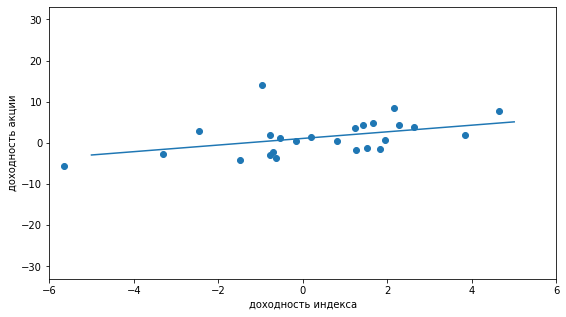

interval: [0.483, 2.578]
Ожидаемая доходность через 1 неделю=1.531
   w=0.804, intercept=1.087


In [ ]:
main_func("DIS_Disney", 'DIS Historical Data.csv')

DE_Deere...
p = 0.977076
null hypothesis: x comes from a normal distribution
The null hypothesis cannot be rejected

риск=3.798


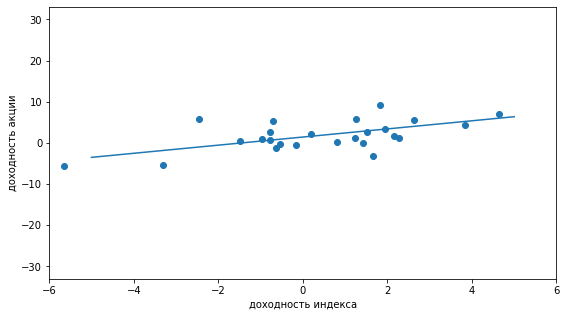

interval: [0.921, 3.016]
Ожидаемая доходность через 1 неделю=1.968
   w=0.987, intercept=1.425


In [ ]:
main_func("DE_Deere...", 'DE Historical Data.csv')

TWTR_Twitter
p = 0.158093
null hypothesis: x comes from a normal distribution
The null hypothesis cannot be rejected

риск=8.607


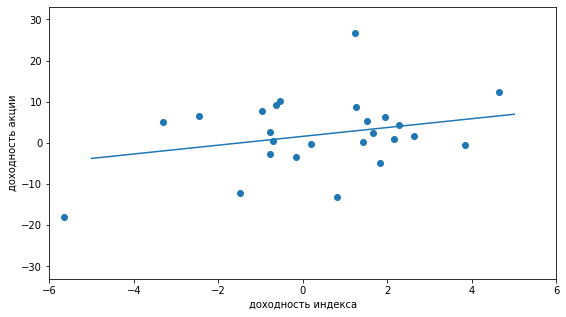

interval: [1.137, 3.233]
Ожидаемая доходность через 1 неделю=2.185
   w=1.072, intercept=1.594


In [ ]:
main_func("TWTR_Twitter", 'TWTR Historical Data.csv')

LNG_Cheniere
p = 0.425107
null hypothesis: x comes from a normal distribution
The null hypothesis cannot be rejected

риск=3.811


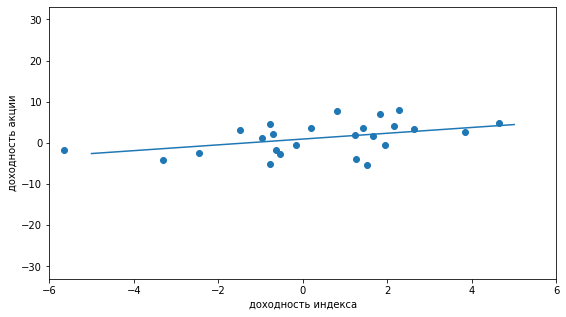

interval: [0.275, 2.37]
Ожидаемая доходность через 1 неделю=1.322
   w=0.704, intercept=0.934


In [ ]:
main_func("LNG_Cheniere", 'LNG Historical Data.csv')

ABBV_Abbvie
p = 0.737377
null hypothesis: x comes from a normal distribution
The null hypothesis cannot be rejected

риск=3.626


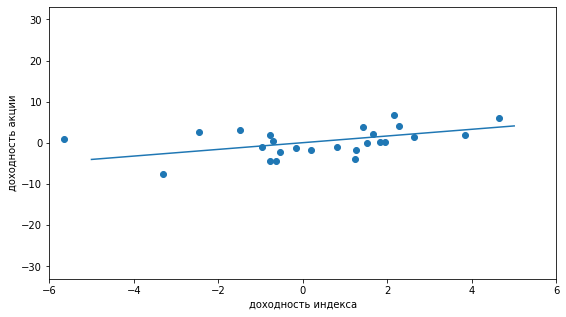

interval: [-0.546, 1.549]
Ожидаемая доходность через 1 неделю=0.502
   w=0.814, intercept=0.053


In [ ]:
main_func("ABBV_Abbvie", 'ABBV Historical Data.csv')

CI_Cigna
p = 0.0191792
null hypothesis: x comes from a normal distribution
The null hypothesis cannot be rejected

риск=6.084


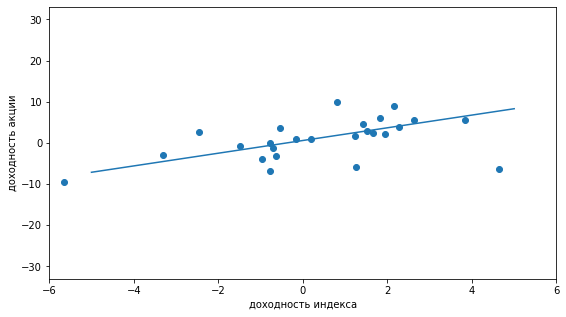

interval: [0.386, 2.481]
Ожидаемая доходность через 1 неделю=1.434
   w=1.543, intercept=0.583


In [ ]:
main_func("CI_Cigna", 'CI Historical Data.csv')